In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode
%matplotlib inline  

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score




In [3]:
thesis_embeddings = pd.read_csv('thesis_face_embeddings/guess_who_embeddings_pandas.csv')

emb = thesis_embeddings.encodings

emb = (emb
 .str.replace('\n','')
 .str.replace('\r','')
 .str.replace('[','')
 .str.replace(']','')
 .str.split())

emb_lists = emb.tolist()

thesis_emb = np.asarray(emb_lists)

thesis_emb = thesis_emb.astype(np.float)

In [4]:
X_test = thesis_emb 

In [5]:
df = pd.read_csv('csv/thesis_faces_ground_truth.csv')

In [6]:
glasses_df = df[['faceID', 'glasses']].sort_values('faceID').reset_index().drop(columns='index')


In [7]:
y_test = glasses_df.glasses.values

In [8]:
glasses_keras_model = pickle.load(open('celeba/glasses_keras_model.sav', 'rb'))

C:\Users\Paradigit\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
y_prob = glasses_keras_model.predict(X_test)
y_pred = (y_prob > 0.5)

In [10]:

print("{:.3}".format(accuracy_score(y_test, y_pred)))

print(classification_report(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

0.979
             precision    recall  f1-score   support

      False       1.00      0.98      0.99       169
       True       0.86      1.00      0.92        24

avg / total       0.98      0.98      0.98       193

[[165   4]
 [  0  24]]


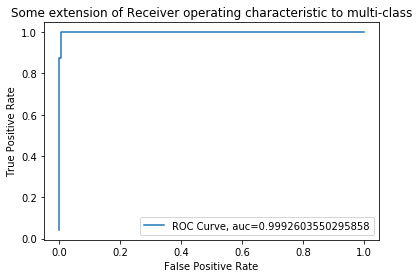

In [29]:
fpr, tpr, _ = roc_curve(y_test,  y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr,tpr,label="ROC Curve, auc="+str(auc))
plt.legend(loc=4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')

plt.show()

In [11]:
glasses_df['pred_glasses'] = y_pred
glasses_df['pred_prob_glasses'] = y_prob

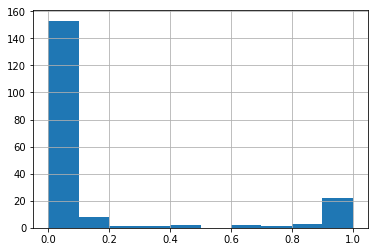

In [31]:
glasses_df.pred_prob_glasses.hist()

C:\Users\Paradigit\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


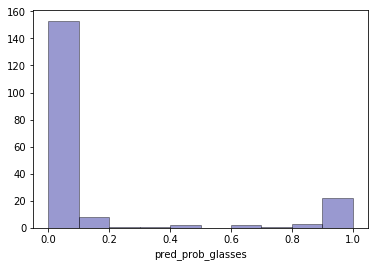

In [34]:
sns.distplot(glasses_df.pred_prob_glasses, hist=True, kde=False, 
             bins=10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'})

In [12]:
def confusion(row):
    if row.glasses == 0:
        if row.pred_glasses == 0:
            return 'true_no_glasses'
        if row.pred_glasses == 1:
            return 'false_glasses'
    
    if row.glasses == 1:
        if row.pred_glasses == 0:
            return 'false_no_glasses'
        if row.pred_glasses == 1:
            return 'true_glasses'


In [13]:
glasses_df['confusion'] = glasses_df.apply(confusion, axis=1)

In [37]:
glasses_df.confusion.value_counts()

true_no_glasses    165
true_glasses        24
false_glasses        4
Name: confusion, dtype: int64

In [16]:
tg_m = glasses_df[glasses_df.confusion == 'true_glasses']['pred_prob_glasses'].mean()
tg_std = glasses_df[glasses_df.confusion == 'true_glasses']['pred_prob_glasses'].std()

g_m = glasses_df[glasses_df.pred_glasses == 1]['pred_prob_glasses'].mean()
g_std = glasses_df[glasses_df.pred_glasses == 1]['pred_prob_glasses'].std()

tng_m = 1 - glasses_df[glasses_df.confusion == 'true_no_glasses']['pred_prob_glasses'].mean()
tng_std = glasses_df[glasses_df.confusion == 'true_no_glasses']['pred_prob_glasses'].std()

ng_m = 1 - glasses_df[glasses_df.pred_glasses == 0]['pred_prob_glasses'].mean()
ng_std = glasses_df[glasses_df.pred_glasses == 0]['pred_prob_glasses'].std()

print('True glasses Mean Probability:',tg_m)
print('True glasses std Probability:',tg_std)
print()
print('True no glasses Mean Probability:',tng_m)
print('True no glasses std Probability:',tng_std)
print()
print('glasses Mean Probability:',g_m)
print('glasses std Probability:',g_std)
print()
print(' no glasses Mean Probability:',ng_m)
print('no glasses std Probability:',ng_std)

True glasses Mean Probability: 0.9754824042320251
True glasses std Probability: 0.049609966576099396

True no glasses Mean Probability: 0.9787546638399363
True no glasses std Probability: 0.06661634892225266

glasses Mean Probability: 0.9417628645896912
glasses std Probability: 0.10541487485170364

 no glasses Mean Probability: 0.9787546638399363
no glasses std Probability: 0.06661634892225266


In [23]:
glasses_df[glasses_df.confusion == 'false_glasses']

,faceID,glasses,pred_glasses,pred_prob_glasses,confusion
13,IMG_0199,False,True,0.723995,false_glasses
54,IMG_7547,False,True,0.617285,false_glasses
140,IMG_9198,False,True,0.926101,false_glasses
154,IMG_9409,False,True,0.690400,false_glasses


C:\Users\Paradigit\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0.5,0,'')]

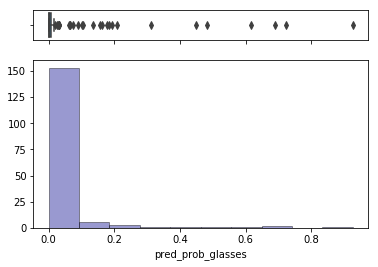

In [37]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(glasses_df[glasses_df.glasses == False].pred_prob_glasses, ax=ax_box)

sns.distplot(glasses_df[glasses_df.glasses == False].pred_prob_glasses, hist=True, kde=False, 
             bins=10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'}, ax=ax_hist)


# Remove x axis name for the boxplot
ax_box.set(xlabel='')


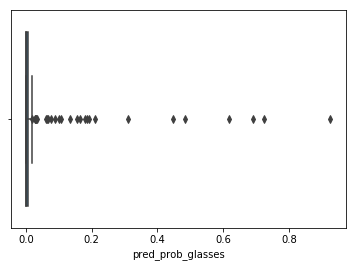

In [38]:
sns.boxplot(glasses_df[glasses_df.glasses == False].pred_prob_glasses)

C:\Users\Paradigit\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0.5,'Frequency'), Text(0.5,0,'Probality of wearing Glasses')]

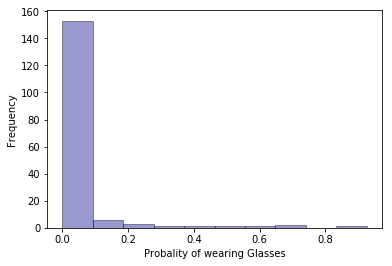

In [42]:
#false glasss
sns.distplot(glasses_df[glasses_df.glasses == False].pred_prob_glasses, hist=True, kde=False, 
             bins=10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'}).set(ylabel='Frequency', xlabel='Probality of wearing Glasses')

C:\Users\Paradigit\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0.5,'Frequency'), Text(0.5,0,'Probality of wearing Glasses')]

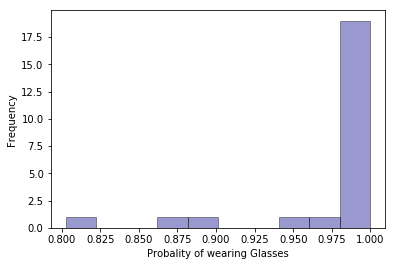

In [43]:
#True glasss

sns.distplot(glasses_df[glasses_df.glasses == True].pred_prob_glasses, hist=True, kde=False, 
             bins=10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'}).set(ylabel='Frequency', xlabel='Probality of wearing Glasses')

C:\Users\Paradigit\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Paradigit\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


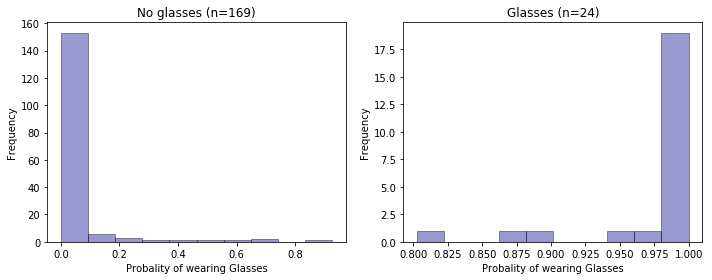

In [58]:
f, (ax1, ax2) = plt.subplots(1,2,  figsize=(10, 4))




sns.distplot(glasses_df[glasses_df.glasses == False].pred_prob_glasses, hist=True, kde=False, 
             bins=10, color = 'darkblue', ax=ax1,
             hist_kws={'edgecolor':'black'}).set(ylabel='Frequency', xlabel='Probality of wearing Glasses', title='No glasses (n=169)')

sns.distplot(glasses_df[glasses_df.glasses == True].pred_prob_glasses, hist=True, kde=False, 
             bins=10, color = 'darkblue', ax=ax2,
             hist_kws={'edgecolor':'black'}).set(ylabel='Frequency', xlabel='Probality of wearing Glasses', title='Glasses (n=24)')

plt.tight_layout()

C:\Users\Paradigit\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'true_no_glasses')

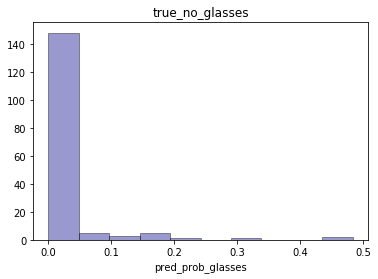

In [43]:
sns.distplot(glasses_df[glasses_df.confusion == 'true_no_glasses'].pred_prob_glasses, hist=True, kde=False, 
             bins=10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'}).set_title('true_no_glasses')

C:\Users\Paradigit\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'true_glasses')

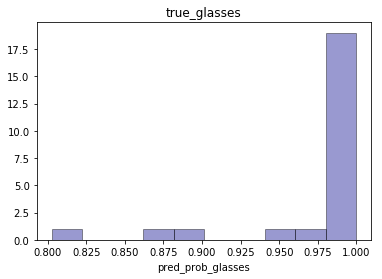

In [44]:
sns.distplot(glasses_df[glasses_df.confusion == 'true_glasses'].pred_prob_glasses, hist=True, kde=False, 
             bins=10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'}).set_title('true_glasses')

In [14]:
import matplotlib.image as mpimg

In [15]:
img_dir = 'small_correct-images/'

In [18]:
glasses_df.head()

,faceID,glasses,pred_glasses,pred_prob_glasses,confusion
0,IMG_0003,False,False,0.031975,true_no_glasses
1,IMG_0018,False,False,0.000025,true_no_glasses
2,IMG_0033,False,False,0.000005,true_no_glasses
3,IMG_0048,False,False,0.000019,true_no_glasses
4,IMG_0063,False,False,0.000006,true_no_glasses


In [16]:
false_glasses = glasses_df[glasses_df.confusion == 'false_glasses'].faceID.values
false_glasses_prob = glasses_df[glasses_df.confusion == 'false_glasses'].pred_prob_glasses.values

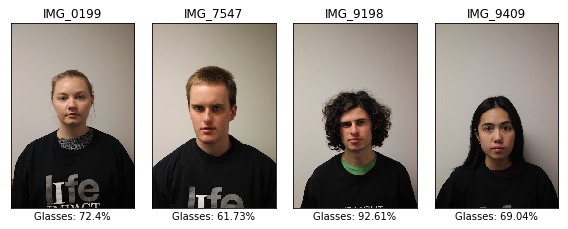

In [17]:
plt.figure(figsize=(8,8))
for i, face in enumerate(false_glasses):
    
    plt.subplot(2,4,i+1).set_title(face)
    
    face = face + ".JPG"
    img=mpimg.imread(img_dir + face)
    imgplot = plt.imshow(img)
    
    #remove ticks for x and y axes
    plt.xticks([], [])
    plt.yticks([], [])
    
    #label probability male score
    plt.xlabel('Glasses: ' + str(round(false_glasses_prob[i] * 100, 2)) + '%')

plt.tight_layout()
plt.show()

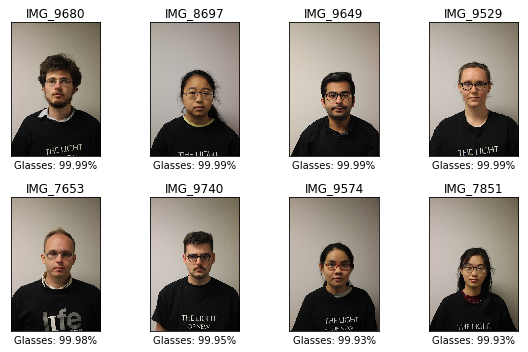

In [21]:
# 8  true glasses classification by both human and model with highest prob scores
true_g = glasses_df[glasses_df.confusion == 'true_glasses'].sort_values('pred_prob_glasses', ascending=False).faceID.values
true_g_prob = glasses_df[glasses_df.confusion == 'true_glasses'].sort_values('pred_prob_glasses', ascending=False).pred_prob_glasses.values

plt.figure(figsize=(8,5))
for i, face in enumerate(true_g[:8]):
    
    plt.subplot(2,4,i+1).set_title(face)
    
    face = face + ".JPG"
    img=mpimg.imread(img_dir + face)
    imgplot = plt.imshow(img)
    
    #remove ticks for x and y axes
    plt.xticks([], [])
    plt.yticks([], [])
    
    #label probability male score
    plt.xlabel('Glasses: ' + str(round(true_g_prob[i] * 100,2)) + '%')

plt.tight_layout()
plt.show()

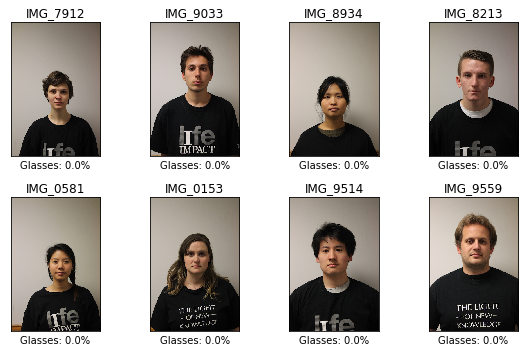

In [23]:
# 8  true no glasses classification by both human and model with highest prob scores
true_ng = glasses_df[glasses_df.confusion == 'true_no_glasses'].sort_values('pred_prob_glasses', ascending=True).faceID.values
true_ng_prob = glasses_df[glasses_df.confusion == 'true_no_glasses'].sort_values('pred_prob_glasses', ascending=True).pred_prob_glasses.values

plt.figure(figsize=(8,5))
for i, face in enumerate(true_ng[:8]):
    
    plt.subplot(2,4,i+1).set_title(face)
    
    face = face + ".JPG"
    img=mpimg.imread(img_dir + face)
    imgplot = plt.imshow(img)
    
    #remove ticks for x and y axes
    plt.xticks([], [])
    plt.yticks([], [])
    
    #label probability male score
    plt.xlabel('Glasses: ' + str(round(true_ng_prob[i] * 100,2)) + '%')

plt.tight_layout()
plt.show()

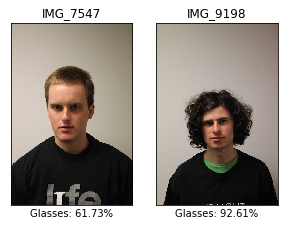

In [35]:
plt.figure(figsize=(10,10))
for i, face in enumerate(false_glasses):
    if i == 1 or i == 2:
        plt.subplot(2,4,i+1).set_title(face)

        face = face + ".JPG"
        img=mpimg.imread(img_dir + face)
        imgplot = plt.imshow(img)

        #remove ticks for x and y axes
        plt.xticks([], [])
        plt.yticks([], [])

        #label probability male score
        plt.xlabel('Glasses: ' + str(round(false_glasses_prob[i] * 100, 2)) + '%')

#plt.tight_layout()
plt.show()

In [30]:
glasses_df[glasses_df.pred_glasses == True].sort_values('pred_prob_glasses', ascending = True)

,faceID,glasses,pred_glasses,pred_prob_glasses,confusion
54,IMG_7547,False,True,0.617285,false_glasses
154,IMG_9409,False,True,0.690400,false_glasses
13,IMG_0199,False,True,0.723995,false_glasses
151,IMG_9364,True,True,0.802656,true_glasses
169,IMG_9634,True,True,0.875788,true_glasses
88,IMG_8078,True,True,0.890341,true_glasses
140,IMG_9198,False,True,0.926101,false_glasses
133,IMG_9093,True,True,0.948047,true_glasses
114,IMG_8667,True,True,0.965271,true_glasses
80,IMG_7942,True,True,0.983756,true_glasses
